# User Behavior Data from Taobao for Recommendation
##### data source: https://tianchi.aliyun.com/dataset/dataDetail?dataId=649

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import Image

## Ask
To understand business objectives, we first need to talk with the stakeholder to clarify the problem that we are trying to solve and ask lots of open-ended questions. In this case, the scenario is that the company's GMV (Gross Merchandise Volume) decreases. The stakeholder wants me to find out what method we can try to improve our GMV.

## Perpare

To solve this problem, I need to find the datasets containing the information that I'm interested in, such as customer buying history. Also, I need to make sure that the data source is trustworthy. Also, I need to notify customers before using this dataset. In this case, the dataset I got was from Taobao itself back in 2017 and it's an open-source dataset. Thus, the dataset is convincing and won't have any data security issues.

## Process

In [2]:
# load datasets
col_names = ['User_Id','Item_Id','Category_Id','Behavior_type','Timestamp']
df = pd.read_csv('UserBehavior.csv', names = col_names, header=None, nrows = 10000000)
df.head() # show first five rows

,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [3]:
df.describe() # check if there exist extreme values for numerical features

,User_Id,Item_Id,Category_Id,Timestamp
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,3.151168e+05,2.579448e+06,2.706506e+06,1.511952e+09
std,1.976828e+05,1.487640e+06,1.464218e+06,6.058377e+06
min,1.000000e+00,3.000000e+00,1.147000e+03,-2.034497e+09
25%,1.773220e+05,1.295395e+06,1.338377e+06,1.511762e+09
50%,3.033830e+05,2.579668e+06,2.693696e+06,1.511965e+09
75%,4.289120e+05,3.861127e+06,4.145813e+06,1.512180e+09
max,1.018011e+06,5.163067e+06,5.162429e+06,2.122867e+09


In [4]:
df['Behavior_type'].nunique() # see if there is any typo error for categorical feature

4

In [5]:
# drop the negative values in 'Timestamp'
df_clean_time = df[df['Timestamp'] > 0]
print('Number of rows before drop null values: ', df.shape)
print('Number of rows after drop null values: ', df_clean_time.shape)

Number of rows before drop null values:  (10000000, 5)
Number of rows after drop null values:  (9999971, 5)


In [6]:
# drop null values
df_ttl_clean = df_clean_time.dropna()
print("Number of rows before drop null values: ", df_clean_time.shape)
print("Number of rows after drop null values: ", df_ttl_clean.shape)

Number of rows before drop null values:  (9999971, 5)
Number of rows after drop null values:  (9999971, 5)


In [7]:
df_ttl_drop_duplic = df_ttl_clean.drop_duplicates()
print("Number of rows before drop duplicates: ", df_ttl_clean.shape)
print("Number of rows after drop duplicates: ", df_ttl_drop_duplic.shape)

Number of rows before drop duplicates:  (9999971, 5)
Number of rows after drop duplicates:  (9999966, 5)


In [8]:
df_ttl_drop_duplic.loc[:,'Timestamp']=df_ttl_drop_duplic['Timestamp'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df_ttl_drop_duplic.loc[:,'Date']=df_ttl_drop_duplic['Timestamp'].apply(lambda x:x.split(' ')[0])
df_ttl_drop_duplic.loc[:,'Time']=df_ttl_drop_duplic['Timestamp'].apply(lambda x:x.split(' ')[1])

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/leo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [9]:
# only take the period from 2017/11/25 to 2017/12/3 to discuss
data=df_ttl_drop_duplic[(df_ttl_drop_duplic["Date"]>='2017-11-25')&(df_ttl_drop_duplic["Date"]<='2017-12-03')]
print(data["Date"].value_counts())

2017-12-02    1416836
2017-12-01    1215010
2017-11-25    1051677
2017-11-26    1050916
2017-11-30    1045633
2017-11-29    1035069
2017-11-28    1000311
2017-11-27     993300
2017-12-03     683301
Name: Date, dtype: int64


In [10]:
data.head()

,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp,Date,Time
5,1,4606018,2735466,pv,2017-11-25 05:28:01,2017-11-25,05:28:01
6,1,230380,411153,pv,2017-11-25 13:22:22,2017-11-25,13:22:22
7,1,3827899,2920476,pv,2017-11-26 08:24:33,2017-11-26,08:24:33
8,1,3745169,2891509,pv,2017-11-26 11:44:31,2017-11-26,11:44:31
9,1,1531036,2920476,pv,2017-11-26 14:02:12,2017-11-26,14:02:12


## Analyze

In [11]:
data["Behavior_type"].value_counts()

pv      8494464
cart     532356
fav      276468
buy      188765
Name: Behavior_type, dtype: int64

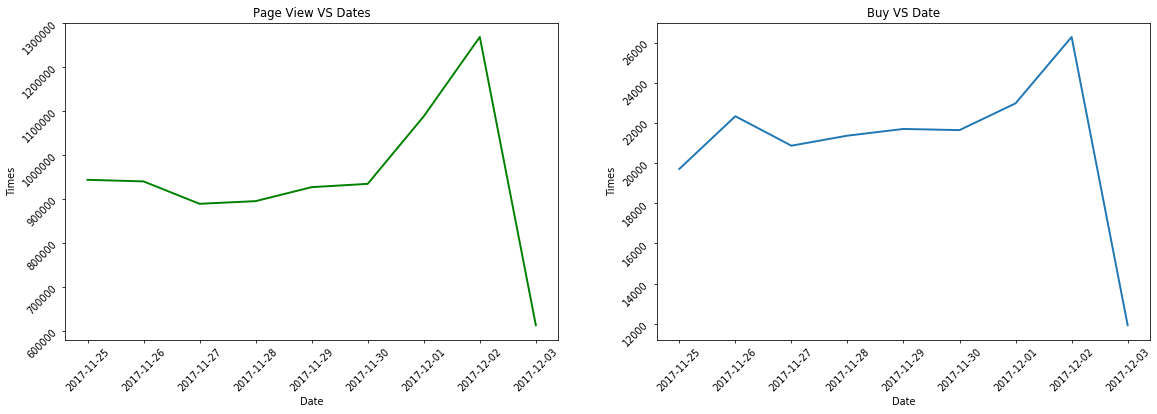

In [12]:
# Visualize user behavior in a week
data_pv = data[data["Behavior_type"]=="pv"][["Behavior_type","Date"]]
data_pv_date=data_pv.groupby(by="Date").count()
data_buy = data[data["Behavior_type"]=="buy"][["Behavior_type","Date"]]
data_buy_date=data_buy.groupby(by="Date").count()
plt.figure(figsize=(20,6),dpi =70)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

plt.sca(ax1)
plt.plot(data_pv_date.index,data_pv_date.values,label="pv",color="green",linewidth=2)
plt.title("Page View VS Dates")
plt.xlabel("Date")
plt.ylabel("Times")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.sca(ax2)
plt.plot(data_buy_date.index,data_buy_date.values,label="buy",linewidth=2)
plt.title("Buy VS Date")
plt.xlabel("Date")
plt.ylabel("Times")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

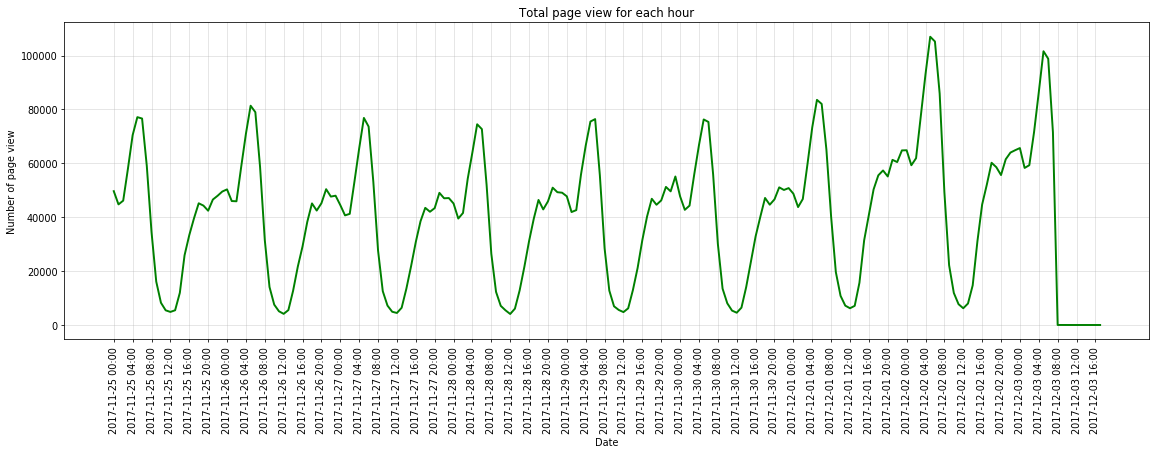

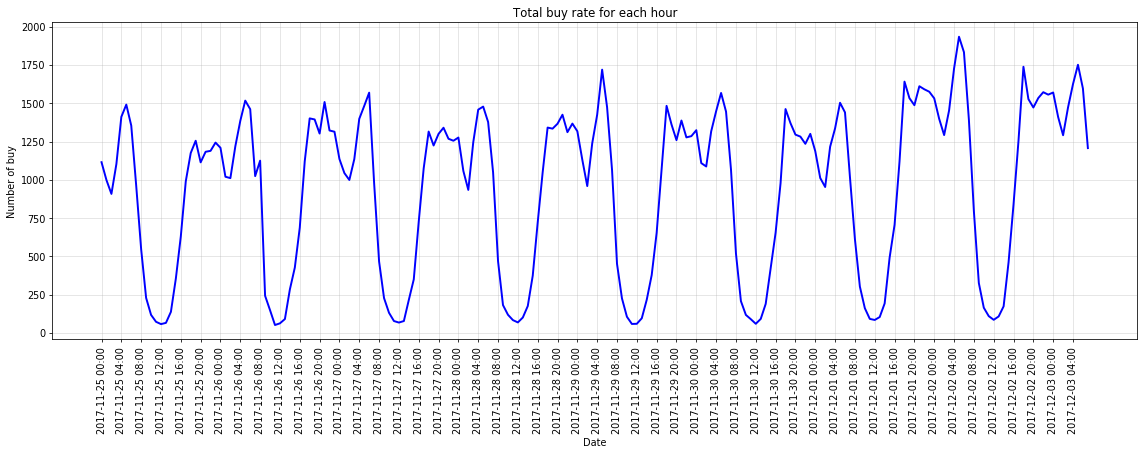

In [13]:
# Visualize user behavior in every hour
data_pv_timestamp=data[data["Behavior_type"]=="pv"][["Behavior_type","Timestamp"]]
data_pv_timestamp["Timestamp"] = pd.to_datetime(data_pv_timestamp["Timestamp"])

data_pv_timestamp=data_pv_timestamp.set_index("Timestamp")
data_pv_timestamp=data_pv_timestamp.resample("H").count()["Behavior_type"]
data_pv_timestamp

data_buy_timestamp=data[data["Behavior_type"]=="buy"][["Behavior_type","Timestamp"]]
data_buy_timestamp["Timestamp"] = pd.to_datetime(data_buy_timestamp["Timestamp"])

data_buy_timestamp=data_buy_timestamp.set_index("Timestamp")
data_buy_timestamp=data_buy_timestamp.resample("H").count()["Behavior_type"]
data_buy_timestamp

plt.figure(figsize=(20,6),dpi =70)
_x1= data_pv_timestamp.index
plt.plot(range(len(_x1)),data_pv_timestamp.values,label="view",color="green",linewidth=2)
plt.title("Total page view for each hour")

_x1 = [i.strftime("%Y-%m-%d %H:%M") for i in _x1]

plt.xticks(range(len(_x1))[::4],_x1[::4],rotation=90)

plt.xlabel("Date")
plt.ylabel("Number of page view")
plt.grid(alpha=0.4)

plt.figure(figsize=(20,6),dpi =70)
_x2= data_buy_timestamp.index
plt.plot(range(len(_x2)),data_buy_timestamp.values,label="buy",color="blue",linewidth=2)
plt.title("Total buy rate for each hour")

_x2 = [i.strftime("%Y-%m-%d %H:%M") for i in _x2]

plt.xticks(range(len(_x2))[::4],_x2[::4],rotation=90)

plt.xlabel("Date")
plt.ylabel("Number of buy")
plt.grid(alpha=0.4)


In [14]:
# Funnel analysis
behavior_data =data["Behavior_type"].value_counts()
dict_num = {'behavior':behavior_data.index,'numbers':behavior_data.values}
behavior_data = pd.DataFrame(dict_num)
behavior_data.loc[1,"behavior"]="cart+fav"
behavior_data.loc[1,"numbers"]+=behavior_data.loc[2,"numbers"]
behavior_data=behavior_data.loc[[0,1,3],:]
behavior_data

,behavior,numbers
0,pv,8494464
1,cart+fav,808824
3,buy,188765


In [15]:
# Calculate Singele_Pass_Conversion and Overall_Conversion
temp1 = np.array(behavior_data['numbers'][1:])
temp2 = np.array(behavior_data['numbers'][0:-1])
single_convs = temp1 / temp2
single_convs = list(single_convs)
single_convs.insert(0,1)
single_convs = [round(x,4) for x in single_convs] 
behavior_data['Singele_Pass_Conversion'] = single_convs
 
temp3 = np.array(behavior_data['numbers'])
temp4= np.ones(len(behavior_data['numbers'])) * behavior_data['numbers'][0]
total_convs = (temp3 / temp4).tolist()
total_convs = [round(x,4) for x in total_convs]
behavior_data['Overall_Conversion'] = total_convs

behavior_data

,behavior,numbers,Singele_Pass_Conversion,Overall_Conversion
0,pv,8494464,1.0000,1.0000
1,cart+fav,808824,0.0952,0.0952
3,buy,188765,0.2334,0.0222


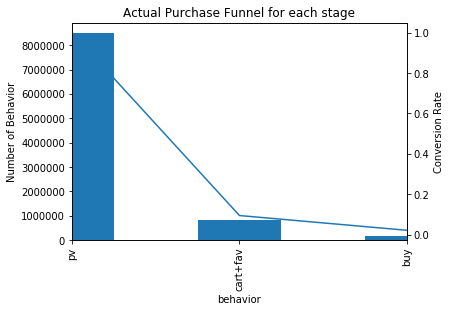

In [16]:
# Funnel visualization
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
behavior_data.plot.bar('behavior','numbers', ax = ax1, legend=False)
behavior_data.plot('behavior','Overall_Conversion', ax = ax2, legend=False)
ax1.set_ylabel('Number of Behavior')
ax2.set_ylabel('Conversion Rate')
ax1.set_title('Actual Purchase Funnel for each stage')
plt.show()

In [17]:
#RFM analysis
buy_data = data[data["Behavior_type"]=="buy"]

series_r=pd.to_datetime('2017-12-04')-pd.to_datetime(buy_data['Date'])

series_r1 = {'Recency':series_r.values}
series_r1 = pd.DataFrame(series_r1,index =series_r.index )

R_data = buy_data.join(series_r1)

series_r2 = R_data.groupby(by = "User_Id").count()["Behavior_type"]

series_r2_dic = {'Frequence':series_r2.values,"User_Id":series_r2.index}
F_data = pd.DataFrame(series_r2_dic)
RF_data = R_data.merge(F_data,on="User_Id",how="left") 
RF_data.head()

,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp,Date,Time,Recency,Frequence
0,100,2971043,4869428,buy,2017-11-25 05:45:49,2017-11-25,05:45:49,9 days,7
1,100,598929,2429887,buy,2017-11-26 21:10:58,2017-11-26,21:10:58,8 days,7
2,100,1046201,3002561,buy,2017-11-26 23:21:38,2017-11-26,23:21:38,8 days,7
3,100,1606258,4098232,buy,2017-11-27 05:39:00,2017-11-27,05:39:00,7 days,7
4,100,4840649,1029459,buy,2017-11-27 05:42:10,2017-11-27,05:42:10,7 days,7


In [18]:
# take mean of R and F and set the threshold of R = 5 and F = 4
RF_data.describe()

,User_Id,Item_Id,Category_Id,Recency,Frequence
count,1.887650e+05,1.887650e+05,1.887650e+05,188765,188765.000000
mean,3.163500e+05,2.583825e+06,2.604820e+06,5 days 01:52:50.017746,5.554520
std,1.993543e+05,1.487156e+06,1.461891e+06,2 days 11:30:45.598647,6.245834
min,2.700000e+01,3.800000e+01,2.171000e+03,1 days 00:00:00,1.000000
25%,1.778620e+05,1.302368e+06,1.320293e+06,3 days 00:00:00,2.000000
50%,3.037070e+05,2.592278e+06,2.640118e+06,5 days 00:00:00,4.000000
75%,4.291570e+05,3.867674e+06,3.904106e+06,7 days 00:00:00,7.000000
max,1.018011e+06,5.163006e+06,5.161669e+06,9 days 00:00:00,85.000000


In [19]:
RF_data["Recency"].dtype
RF_data["Recency"] = RF_data["Recency"]/np.timedelta64(1, 'D')
RF_data["Recency"]=RF_data["Recency"].astype("int64")
print(RF_data.quantile())
# RF_data.max()
RF_data["R"]=(RF_data["Recency"]).apply(lambda x: "high" if x <=5 else "low")
RF_data["F"]=(RF_data["Frequence"]).apply(lambda x: "high" if x >=4 else "low")



User_Id         303707.0
Item_Id        2592278.0
Category_Id    2640118.0
Recency              5.0
Frequence            4.0
Name: 0.5, dtype: float64


In [20]:
def rf(r,f):
    if r=="high" and f=="high":
        return "Value Customers"
    elif r=="low" and f=="high":
        return "Keep Customers"
    elif r=="high" and f=="low":
        return "Develop Customers"
    else:
        return "Retain customers"
    
RF_data['RMF']=RF_data.apply(lambda row: rf(row['R'], row['F']), axis=1)
RF_data.head()

,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp,Date,Time,Recency,Frequence,R,F,RMF
0,100,2971043,4869428,buy,2017-11-25 05:45:49,2017-11-25,05:45:49,9,7,low,high,Keep Customers
1,100,598929,2429887,buy,2017-11-26 21:10:58,2017-11-26,21:10:58,8,7,low,high,Keep Customers
2,100,1046201,3002561,buy,2017-11-26 23:21:38,2017-11-26,23:21:38,8,7,low,high,Keep Customers
3,100,1606258,4098232,buy,2017-11-27 05:39:00,2017-11-27,05:39:00,7,7,low,high,Keep Customers
4,100,4840649,1029459,buy,2017-11-27 05:42:10,2017-11-27,05:42:10,7,7,low,high,Keep Customers


In [21]:
RF_data_new = RF_data[['User_Id', 'RMF']].drop_duplicates()

Develop Customers    33044
Retain customers     26006
Value Customers      15448
Keep Customers       14161
Name: RMF, dtype: int64


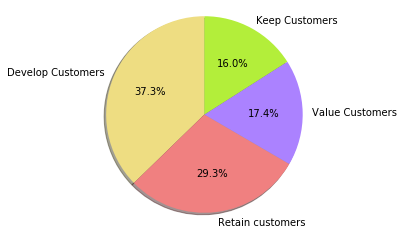

In [22]:
#RFM analysis visualization
rmf_data = RF_data_new['RMF'].value_counts()
print(rmf_data)

labels =rmf_data.index
sizes = rmf_data.values 

fig1, ax1 = plt.subplots()
pie = ax1.pie(sizes,labels=labels, autopct='%1.1f%%',colors=["#EEDD82","#F08080","#AB82FF","#B3EE3A"],
        shadow=True, startangle=90)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Share
##### link to interaction dashboard: https://public.tableau.com/app/profile/leo7402/viz/UserBehaviorDatafromTaobaoforRecommendation/Dashboard1

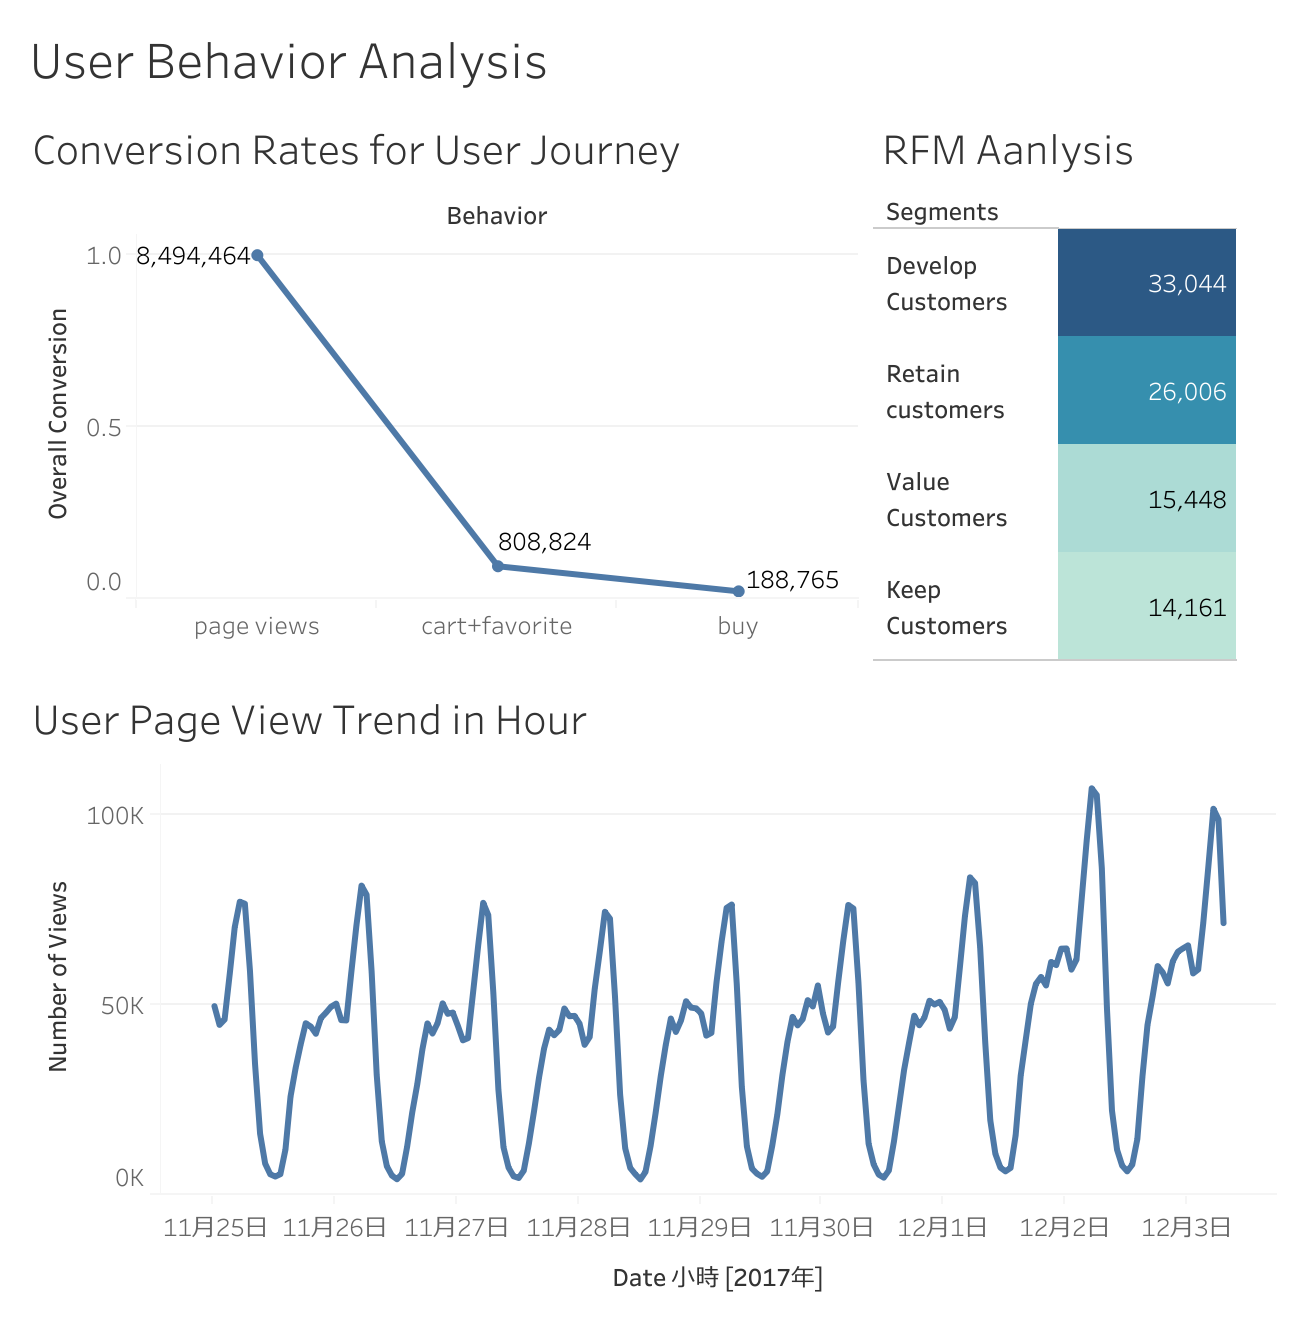

In [23]:
Image(filename = 'Dashboard.png')   

## Act
1. The conversion rate from cart + favorite to buy is about 23.34%. We can try to find out that why 76.66% of customers like products but didn't buy them finally. e.g., limit payment method, price is too high.
2. The result shows that we have a stable amount of 'Value Customers' and this is good. However, we can try to convert develop and keep customers into valuable customers.
3. The result shows that the majority of customers visit our platform starting from 7 pm to 10 pm. We can have some discount activities to attract consumers to buy the product via our platform during this time.